In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pet_df = pd.read_csv("/home/jh20/Data/pet/pet_df.csv")

In [227]:
pet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12731 entries, 0 to 12730
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             12731 non-null  object 
 1   species          12731 non-null  int64  
 2   mission-id       12731 non-null  object 
 3   provider-code    12731 non-null  int64  
 4   breed            12731 non-null  object 
 5   age              12731 non-null  float64
 6   class            12731 non-null  object 
 7   sex              12731 non-null  object 
 8   weight           12731 non-null  float64
 9   shoulder-height  12731 non-null  float64
 10  neck-size        12731 non-null  float64
 11  back-length      12731 non-null  float64
 12  chest-size       12731 non-null  float64
 13  BCS              12731 non-null  int64  
 14  body-part        12731 non-null  int64  
 15  exercise         12731 non-null  int64  
 16  food-count       12731 non-null  int64  
 17  environment 

In [9]:
pet_df.columns

Index(['type', 'species', 'mission-id', 'provider-code', 'breed', 'age',
       'class', 'sex', 'weight', 'shoulder-height', 'neck-size', 'back-length',
       'chest-size', 'BCS', 'body-part', 'exercise', 'food-count',
       'environment', 'defecation', 'food-amount', 'snack-amount', 'food-kind',
       'image-id', 'label', 'points', 'shape', 'part'],
      dtype='object')

In [28]:
pet_df['mission-id'].value_counts()

10_001567    38
20_000024    20
10_000873    20
10_000882    20
10_000881    20
             ..
10_000294     3
10_000450     3
10_000366     3
10_000278     3
10_000293     3
Name: mission-id, Length: 739, dtype: int64

In [30]:
pet_df.loc[pet_df['mission-id'] == '10_001567'][['chest-size', 'weight', 'BCS']].diff(axis = 0)

,chest-size,weight,BCS
10800,NaN,NaN,NaN
10801,0.0,0.0,0.0
10802,0.0,0.0,0.0
10803,0.0,0.0,0.0
10804,0.0,0.0,0.0
10805,0.0,0.0,0.0
10806,0.0,0.0,0.0
10807,0.0,0.0,0.0
10808,0.0,0.0,0.0
10809,0.0,0.0,0.0


- 같은 mission-id의 강아지는 전부 drop_duplicates 해도 괜찮음

In [32]:
pet_df['mission-id'].nunique()

739

In [4]:
df = pet_df.drop_duplicates('mission-id')[['type', 'species', 'mission-id',
                                          'provider-code', 'breed', 'age',
                                          'class', 'sex', 'weight', 'shoulder-height',
                                          'neck-size', 'back-length', 'chest-size',
                                          'BCS', 'body-part', 'exercise', 'food-count',
                                          'environment', 'defecation', 'food-amount',
                                          'snack-amount', 'food-kind']]
df

,type,species,mission-id,provider-code,breed,age,class,sex,weight,shoulder-height,...,chest-size,BCS,body-part,exercise,food-count,environment,defecation,food-amount,snack-amount,food-kind
0,A,10,10_000077,1,ETC,4.0,MS,IM,11.00,30.0,...,49.0,5,12,3,2,1,2,1.00,1.00,1
18,A,10,10_000078,3,ETC,2.0,MS,SF,9.60,35.0,...,50.0,5,17,1,2,1,1,2.00,1.00,1
30,A,10,10_000083,2,DRI,12.0,SS,IF,3.50,22.0,...,32.0,5,10,1,4,1,1,1.00,20.00,1
38,A,10,10_000084,2,ETC,4.0,SS,SF,5.75,33.0,...,40.0,4,18,3,2,1,1,1.00,19.99,1
44,A,10,10_000085,2,POO,16.0,SS,IF,3.59,23.0,...,35.0,5,17,3,1,1,1,1.49,20.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,A,20,20_000016,22,KOR,7.0,SH,CM,5.00,22.0,...,40.0,7,12,2,4,1,1,1.00,10.00,1
12660,A,20,20_000018,9,KOR,0.0,SH,IM,3.63,25.0,...,32.0,4,17,1,2,2,1,0.50,0.00,1
12679,A,20,20_000019,4,SIA,7.0,SH,SF,3.80,24.0,...,35.0,6,2,1,4,1,1,1.00,0.00,1
12691,A,20,20_000023,2,KOR,8.0,SH,CM,6.15,25.0,...,42.0,7,11,1,2,1,1,1.50,10.00,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 12711
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             739 non-null    object 
 1   species          739 non-null    int64  
 2   mission-id       739 non-null    object 
 3   provider-code    739 non-null    int64  
 4   breed            739 non-null    object 
 5   age              739 non-null    float64
 6   class            739 non-null    object 
 7   sex              739 non-null    object 
 8   weight           739 non-null    float64
 9   shoulder-height  739 non-null    float64
 10  neck-size        739 non-null    float64
 11  back-length      739 non-null    float64
 12  chest-size       739 non-null    float64
 13  BCS              739 non-null    int64  
 14  body-part        739 non-null    int64  
 15  exercise         739 non-null    int64  
 16  food-count       739 non-null    int64  
 17  environment   

In [44]:
df['food-kind'].value_counts()

1    587
2    151
3      1
Name: food-kind, dtype: int64

In [45]:
df['defecation'].value_counts()

1    733
2      6
Name: defecation, dtype: int64

In [46]:
df['environment'].value_counts()

1    733
2      6
Name: environment, dtype: int64

In [47]:
df['exercise'].value_counts()

2    274
1    271
3    194
Name: exercise, dtype: int64

In [58]:
df['BCS'].value_counts().sort_index()

2     11
3     68
4    173
5    297
6    143
7     37
8      4
9      6
Name: BCS, dtype: int64

In [81]:
df['breed'].value_counts()

MAL    168
ETC    163
POO    149
POM    115
MIX     50
DRI     38
CHI     31
GOL      8
JIN      6
KOR      6
PER      3
RUS      1
SIA      1
Name: breed, dtype: int64

In [190]:
df.BCS.value_counts().sort_index()

2     11
3     68
4    173
5    297
6    143
7     37
8      4
9      6
Name: BCS, dtype: int64

Text(0.5, 1.0, 'BCS barplot')

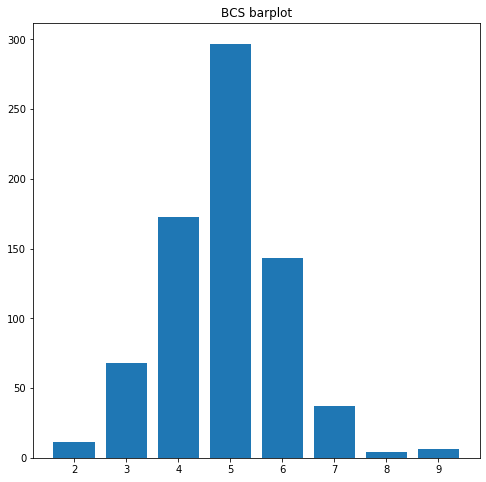

In [189]:
plt.figure(figsize = (8, 8))
plt.bar(df['BCS'].value_counts().index , df['BCS'].value_counts())
plt.title('BCS barplot')

In [82]:
df['species'].value_counts()

10    728
20     11
Name: species, dtype: int64

- 고양이 11마리, 강아지 728마리

In [145]:
df.isnull().sum()

type               0
species            0
mission-id         0
provider-code      0
breed              0
age                0
class              0
sex                0
weight             0
shoulder-height    0
neck-size          0
back-length        0
chest-size         0
BCS                0
body-part          0
exercise           0
food-count         0
environment        0
defecation         0
food-amount        0
snack-amount       0
food-kind          0
dtype: int64

In [84]:
df_mal = df.loc[df['breed'] =='MAL']

In [92]:
df_mal = df_mal[['BCS', 'age', 'weight', 'shoulder-height', 'neck-size',
                 'back-length', 'chest-size', 'exercise',
                 'food-count', 'food-amount', 'snack-amount']]

In [93]:
df_mal

,BCS,age,weight,shoulder-height,neck-size,back-length,chest-size,exercise,food-count,food-amount,snack-amount
140,5,7.0,3.39,20.0,25.0,10.0,32.98,1,2,1.00,0.00
209,7,0.0,2.91,21.0,21.0,19.0,34.00,1,2,0.30,19.99
222,5,18.0,2.99,21.0,21.0,19.0,34.00,1,2,0.30,19.98
458,5,1.0,1.70,20.0,16.0,24.0,28.00,2,2,0.37,1.00
476,7,12.0,6.00,22.0,27.0,23.0,47.00,1,4,0.20,19.99
...,...,...,...,...,...,...,...,...,...,...,...
11916,5,2.0,2.50,25.0,22.0,28.0,30.00,2,1,1.00,1.00
12435,6,9.0,3.10,22.0,22.0,23.0,33.00,1,4,1.00,15.00
12453,6,8.0,3.20,25.0,20.0,23.0,34.00,1,4,1.00,15.00
12472,4,9.8,3.69,27.0,28.0,35.0,39.00,2,2,0.40,10.00


In [85]:
corr_mal = round(df_mal.corr(method='pearson')['BCS'][['age', 'weight', 'shoulder-height', 'neck-size',
                                                       'back-length', 'chest-size', 'exercise',
                                                       'food-count', 'food-amount', 'snack-amount']], 3)

In [99]:
corr_mal = pd.DataFrame(corr_mal)
corr_mal.columns = ['corr_with_BCS']
corr_mal

,corr_with_BCS
age,0.024
weight,0.467
shoulder-height,0.206
neck-size,0.498
back-length,0.246
chest-size,0.458
exercise,0.135
food-count,-0.152
food-amount,0.352
snack-amount,0.098


In [132]:
df_mal

,BCS,age,weight,shoulder-height,neck-size,back-length,chest-size,exercise,food-count,food-amount,snack-amount
140,5,7.0,3.39,20.0,25.0,10.0,32.98,1,2,1.00,0.00
209,7,0.0,2.91,21.0,21.0,19.0,34.00,1,2,0.30,19.99
222,5,18.0,2.99,21.0,21.0,19.0,34.00,1,2,0.30,19.98
458,5,1.0,1.70,20.0,16.0,24.0,28.00,2,2,0.37,1.00
476,7,12.0,6.00,22.0,27.0,23.0,47.00,1,4,0.20,19.99
...,...,...,...,...,...,...,...,...,...,...,...
11916,5,2.0,2.50,25.0,22.0,28.0,30.00,2,1,1.00,1.00
12435,6,9.0,3.10,22.0,22.0,23.0,33.00,1,4,1.00,15.00
12453,6,8.0,3.20,25.0,20.0,23.0,34.00,1,4,1.00,15.00
12472,4,9.8,3.69,27.0,28.0,35.0,39.00,2,2,0.40,10.00


In [14]:
df_dri = df.loc[df['breed'] =='DRI']
df_dri = df_dri[['BCS', 'age', 'weight', 'shoulder-height', 'neck-size',
                 'back-length', 'chest-size', 'exercise',
                 'food-count', 'food-amount', 'snack-amount']]

In [15]:
df_dri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 30 to 12134
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BCS              38 non-null     int64  
 1   age              38 non-null     float64
 2   weight           38 non-null     float64
 3   shoulder-height  38 non-null     float64
 4   neck-size        38 non-null     float64
 5   back-length      38 non-null     float64
 6   chest-size       38 non-null     float64
 7   exercise         38 non-null     int64  
 8   food-count       38 non-null     int64  
 9   food-amount      38 non-null     float64
 10  snack-amount     38 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 3.6 KB


In [16]:
corr_dri = round(df_dri.corr(method='pearson')['BCS'][['age', 'weight', 'shoulder-height', 'neck-size',
                                                       'back-length', 'chest-size', 'exercise',
                                                       'food-count', 'food-amount', 'snack-amount']], 3)

In [17]:
corr_dri = pd.DataFrame(corr_dri)
corr_dri.columns = ['corr_with_BCS']
corr_dri

,corr_with_BCS
age,-0.156
weight,0.634
shoulder-height,0.145
neck-size,0.668
back-length,0.225
chest-size,0.590
exercise,0.020
food-count,0.141
food-amount,0.198
snack-amount,0.162


In [18]:
col_list = list(df_dri.columns)[1:]

def x_y_pred(df, predictor):
    X = df.BCS.values
    Y = df[predictor].values
    predictor = predictor
    
    return X, Y, predictor

def corr_subplot(df, breed):
    
    print(breed + "'s corr plot\n")
    
    fig = plt.figure(figsize = (12, 24))

    for n, col in enumerate(col_list):
    
        X, Y, predictor = x_y_pred(df, col)
    
        ax = fig.add_subplot(5, 2, n + 1)
        ax.scatter(X, Y)
        ax.set_title(f'BCS ~ {col}')
        ax.set_ylabel(col)
        ax.set_xlabel('BCS')

    plt.tight_layout()
    plt.show()
    
    print('\n')
    print('\n')

CHI's corr plot



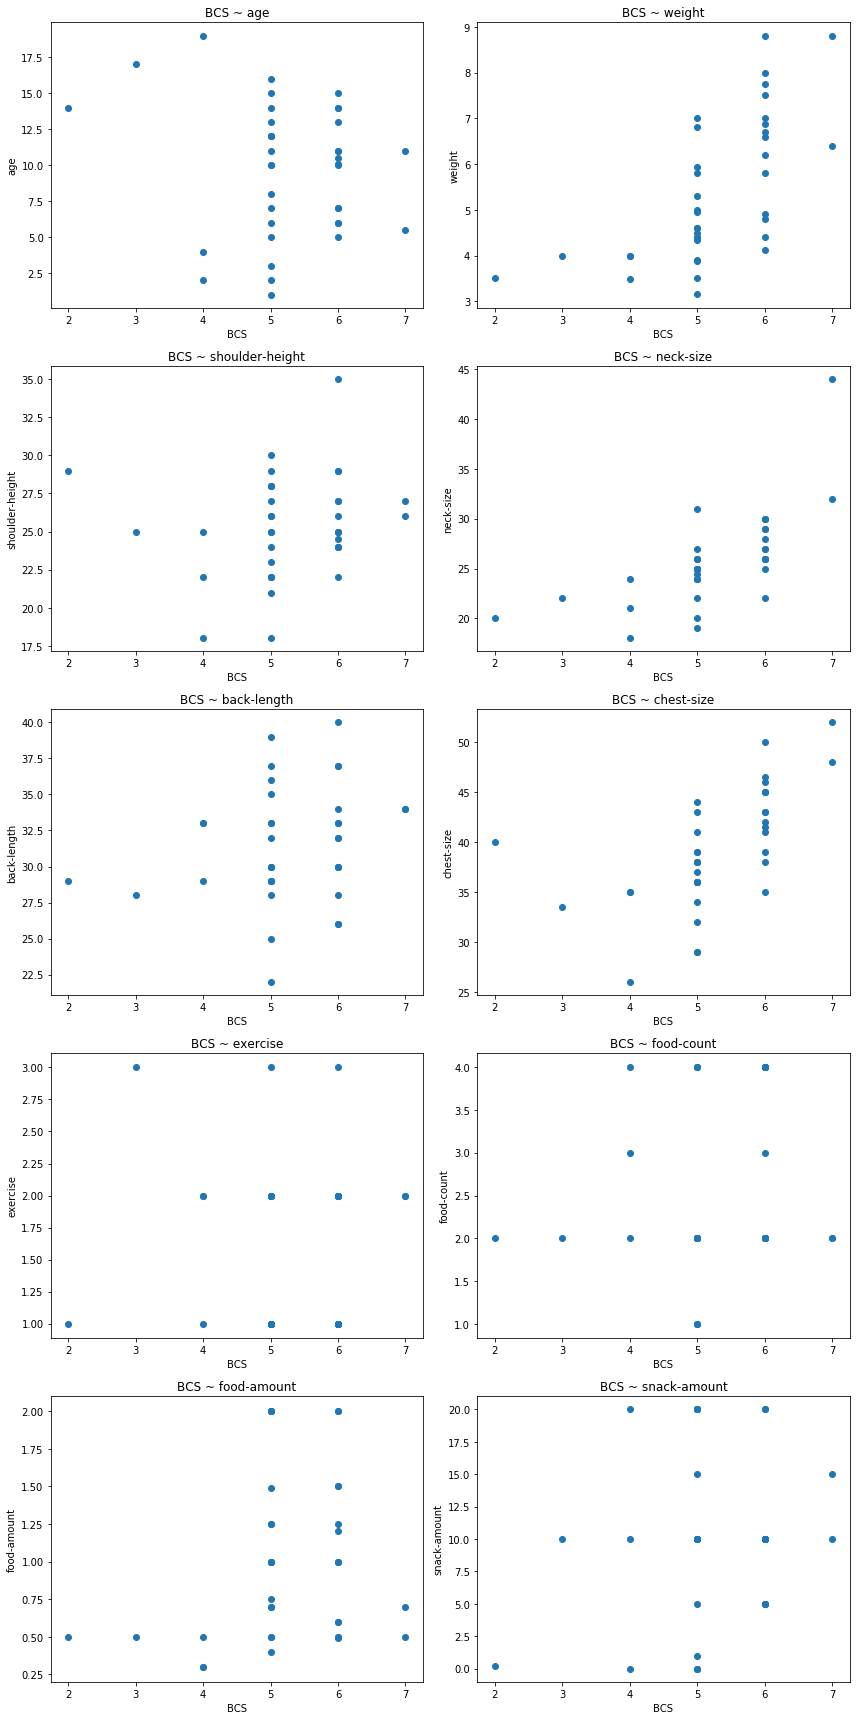

In [19]:
corr_subplot(df_dri, 'CHI')

In [143]:
breed_name = ['MAL', 'ETC', 'POO', 'POM', 'MIX', 'DRI', 'CHI']
breed_name

['MAL', 'ETC', 'POO', 'POM', 'MIX', 'DRI', 'CHI']

MAL's corr plot



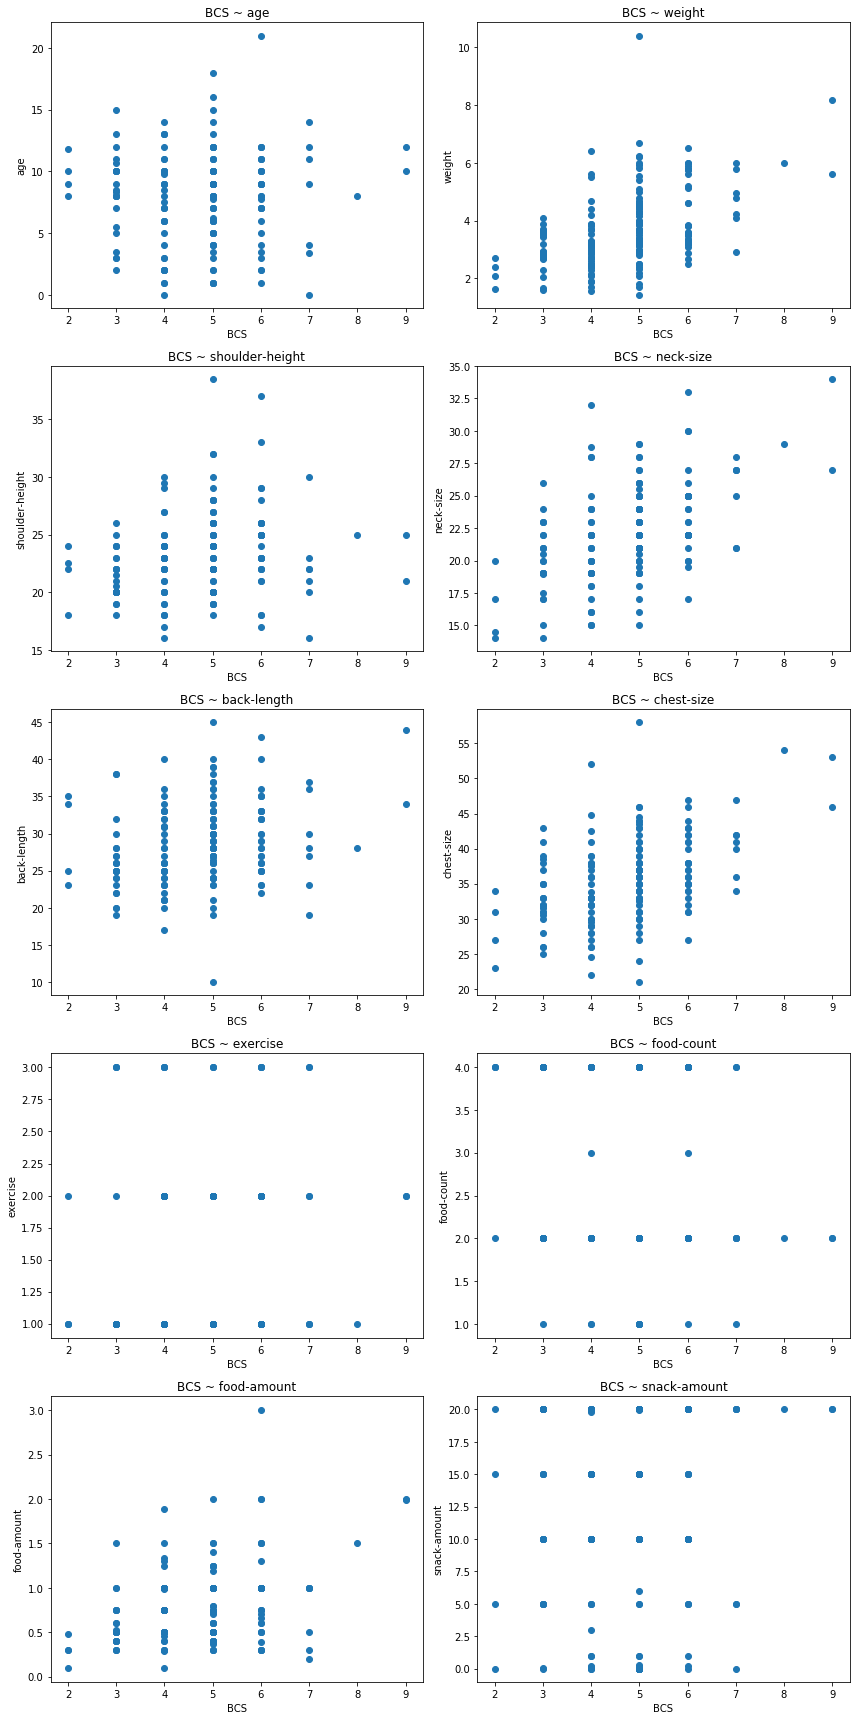





                 corr_with_BCS
age                      0.024
weight                   0.467
shoulder-height          0.206
neck-size                0.498
back-length              0.246
chest-size               0.458
exercise                 0.135
food-count              -0.152
food-amount              0.352
snack-amount             0.098




ETC's corr plot



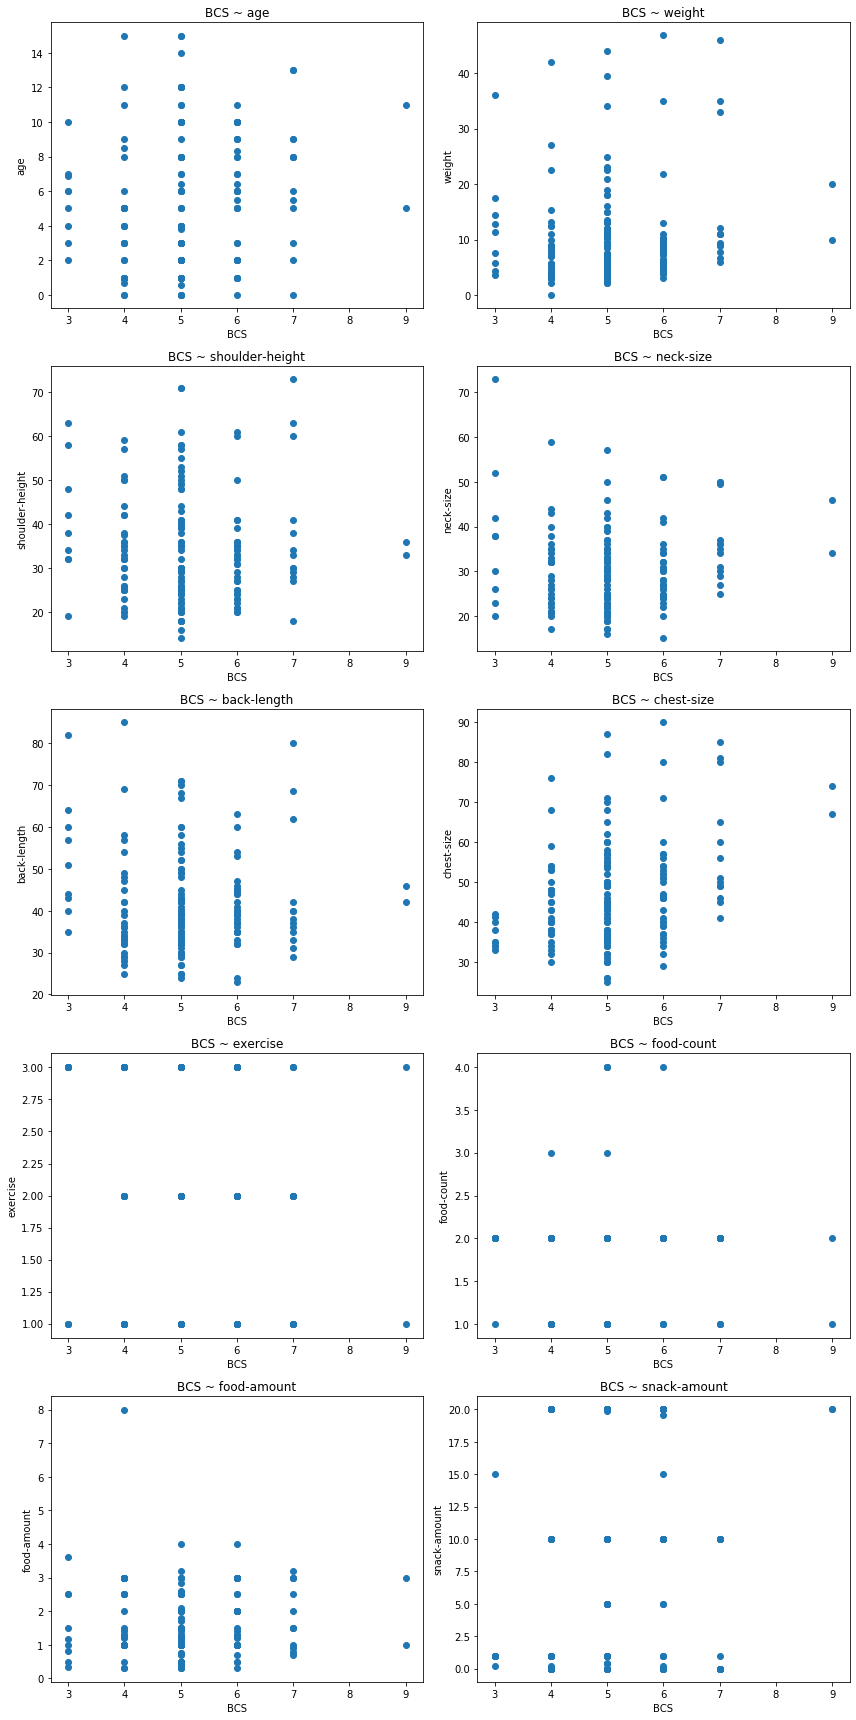





                 corr_with_BCS
age                      0.163
weight                   0.109
shoulder-height         -0.027
neck-size                0.063
back-length             -0.051
chest-size               0.347
exercise                -0.028
food-count               0.066
food-amount              0.031
snack-amount             0.171




POO's corr plot



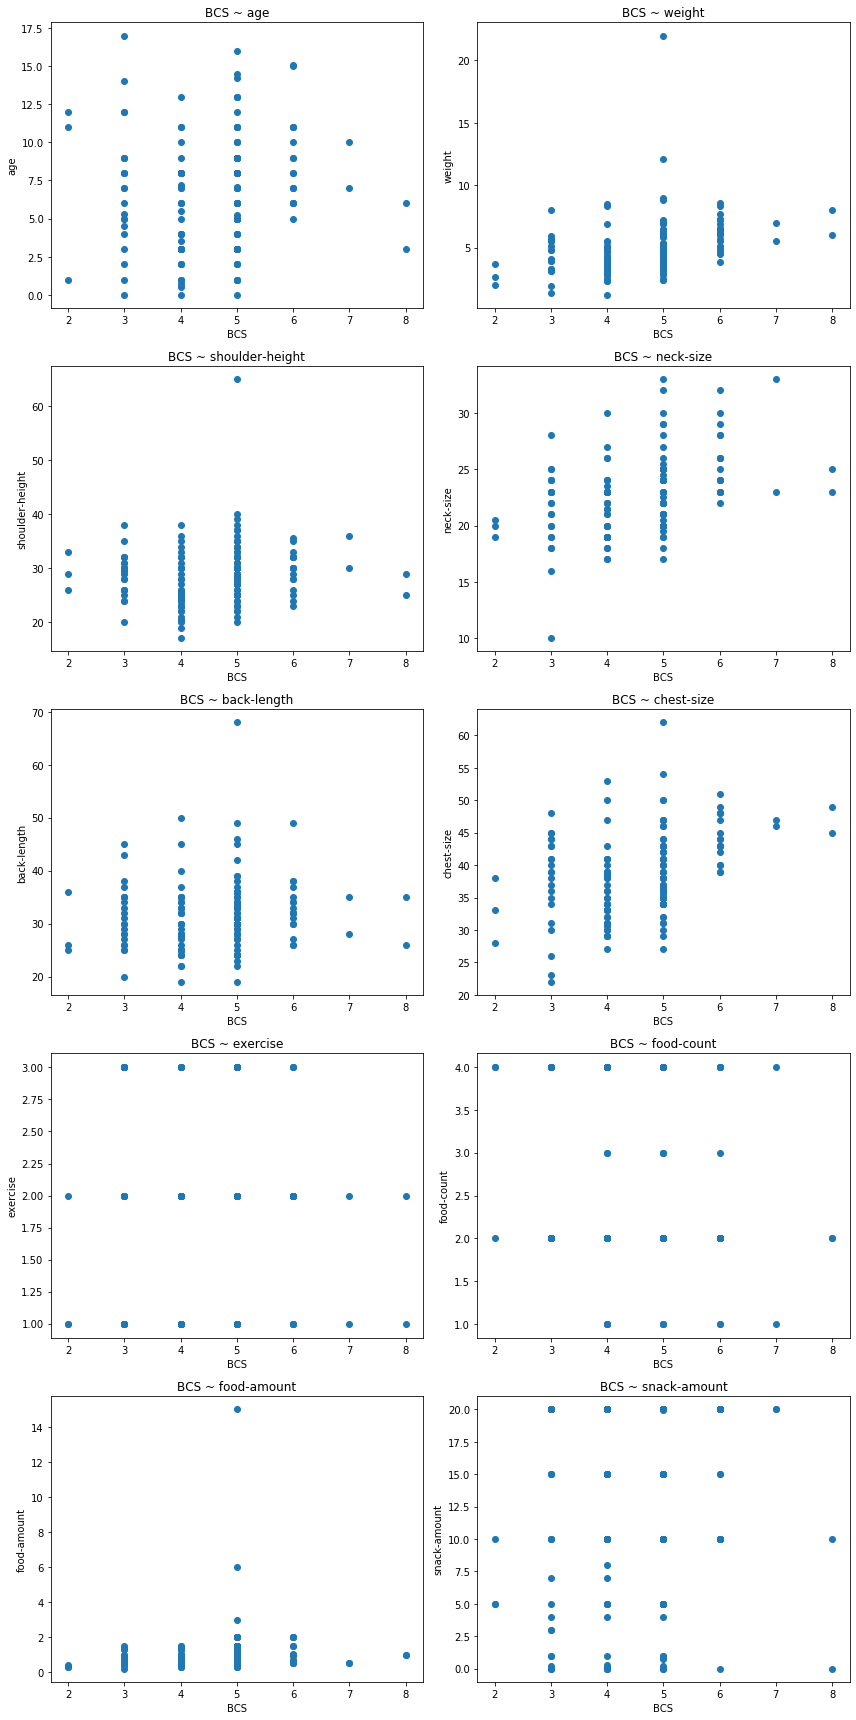





                 corr_with_BCS
age                      0.103
weight                   0.327
shoulder-height          0.112
neck-size                0.399
back-length              0.093
chest-size               0.377
exercise                -0.005
food-count              -0.070
food-amount              0.132
snack-amount             0.182




POM's corr plot



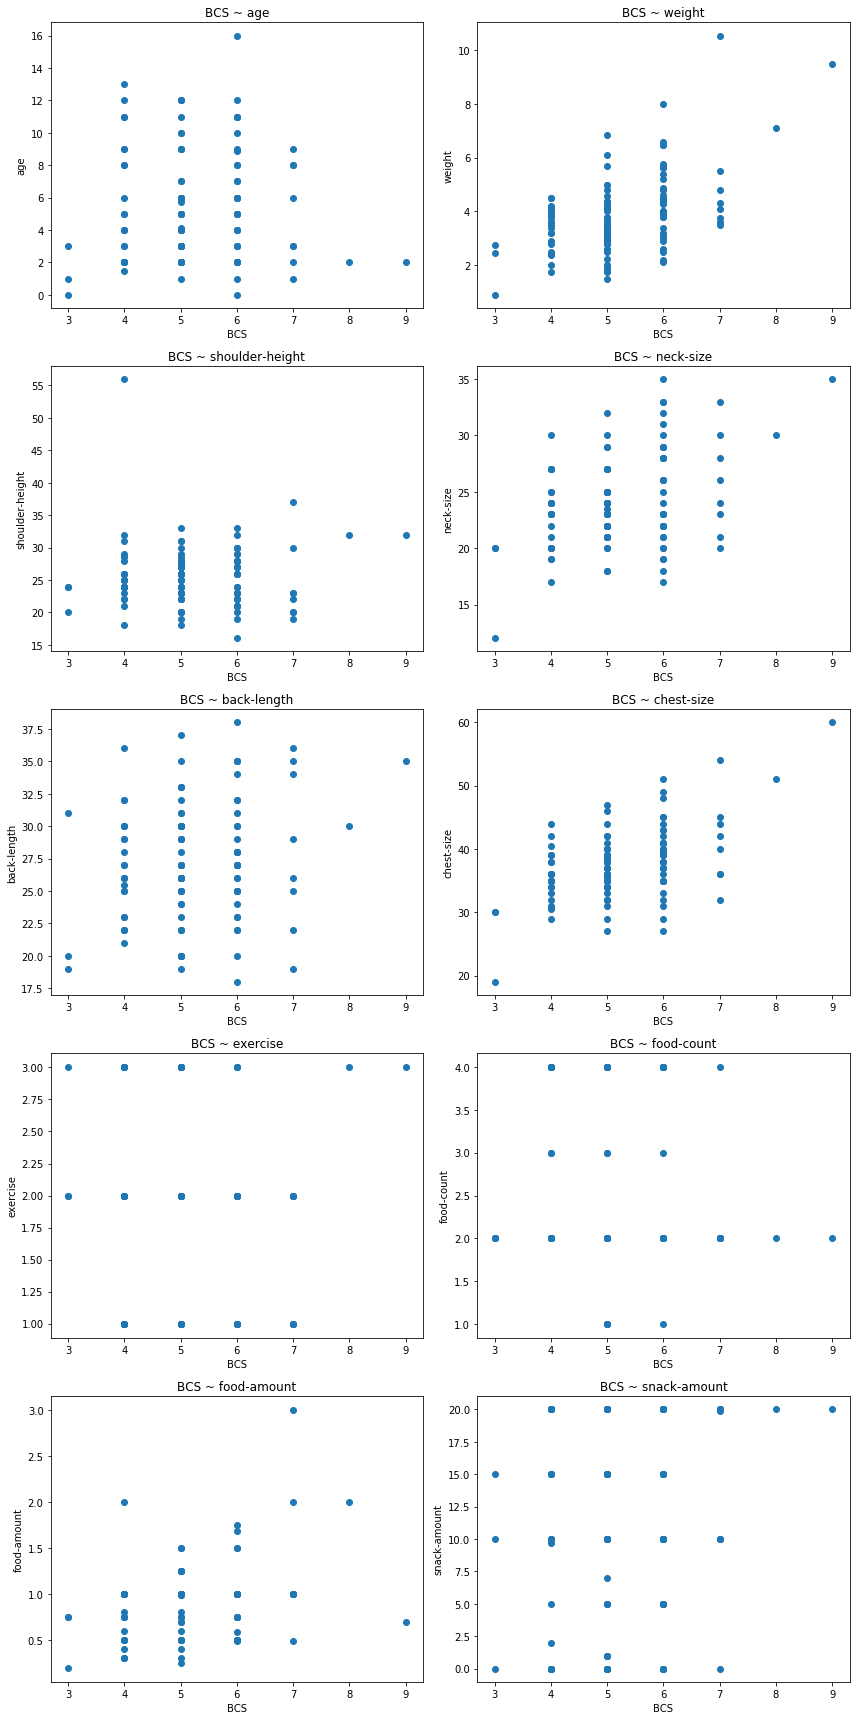





                 corr_with_BCS
age                      0.028
weight                   0.524
shoulder-height          0.024
neck-size                0.392
back-length              0.198
chest-size               0.521
exercise                 0.034
food-count              -0.090
food-amount              0.306
snack-amount             0.161




MIX's corr plot



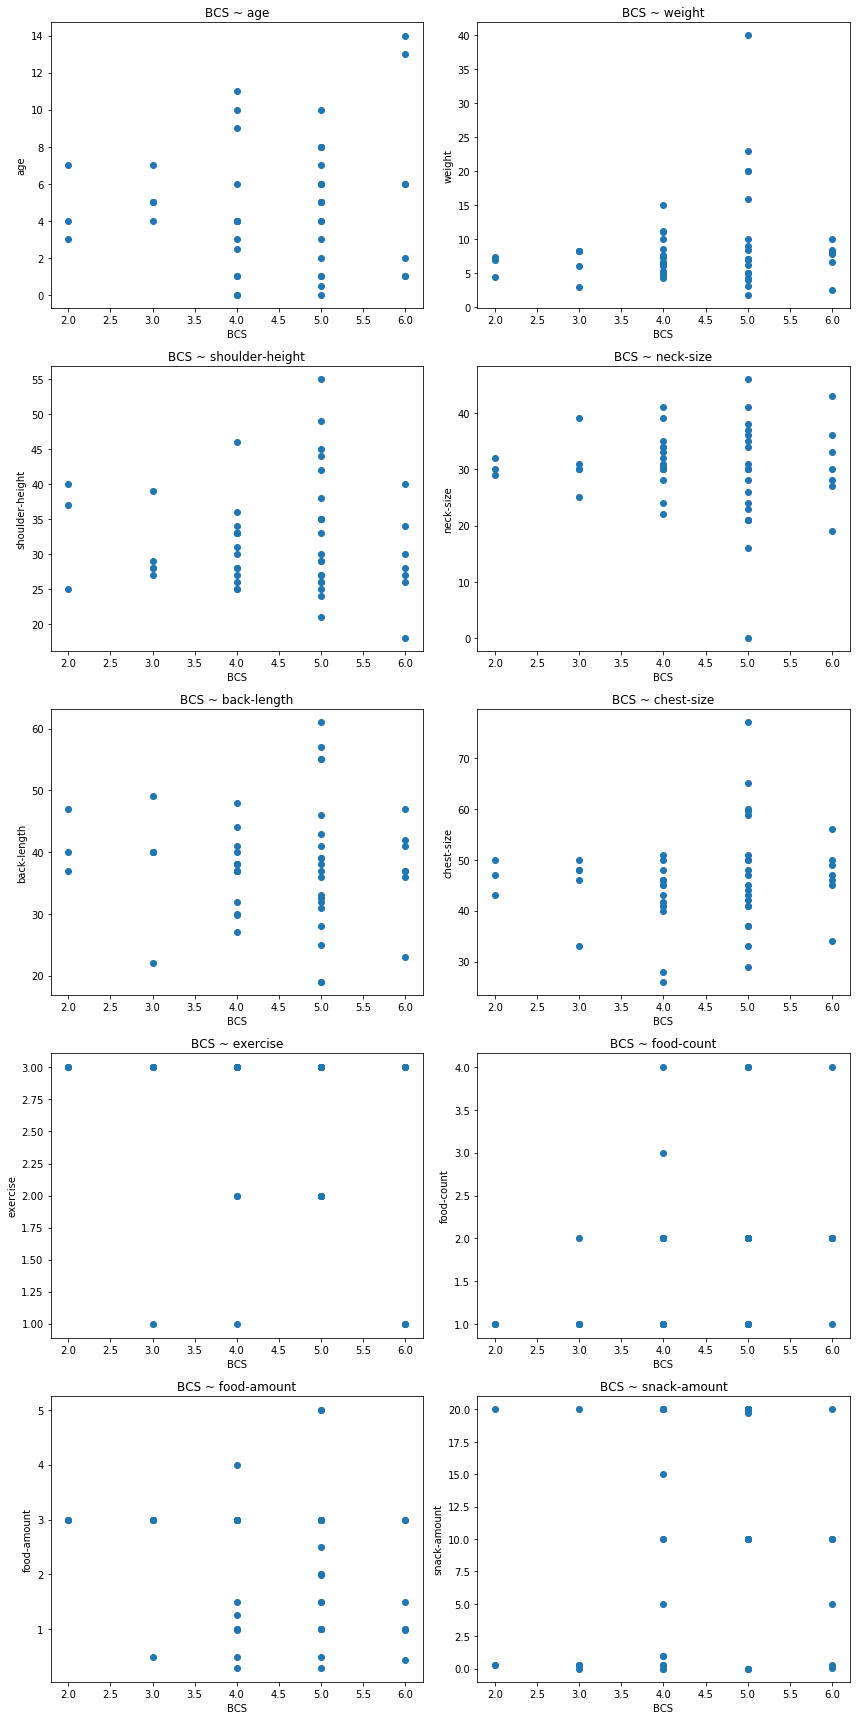





                 corr_with_BCS
age                      0.092
weight                   0.131
shoulder-height         -0.025
neck-size               -0.073
back-length             -0.042
chest-size               0.118
exercise                -0.197
food-count               0.363
food-amount             -0.230
snack-amount             0.212




DRI's corr plot



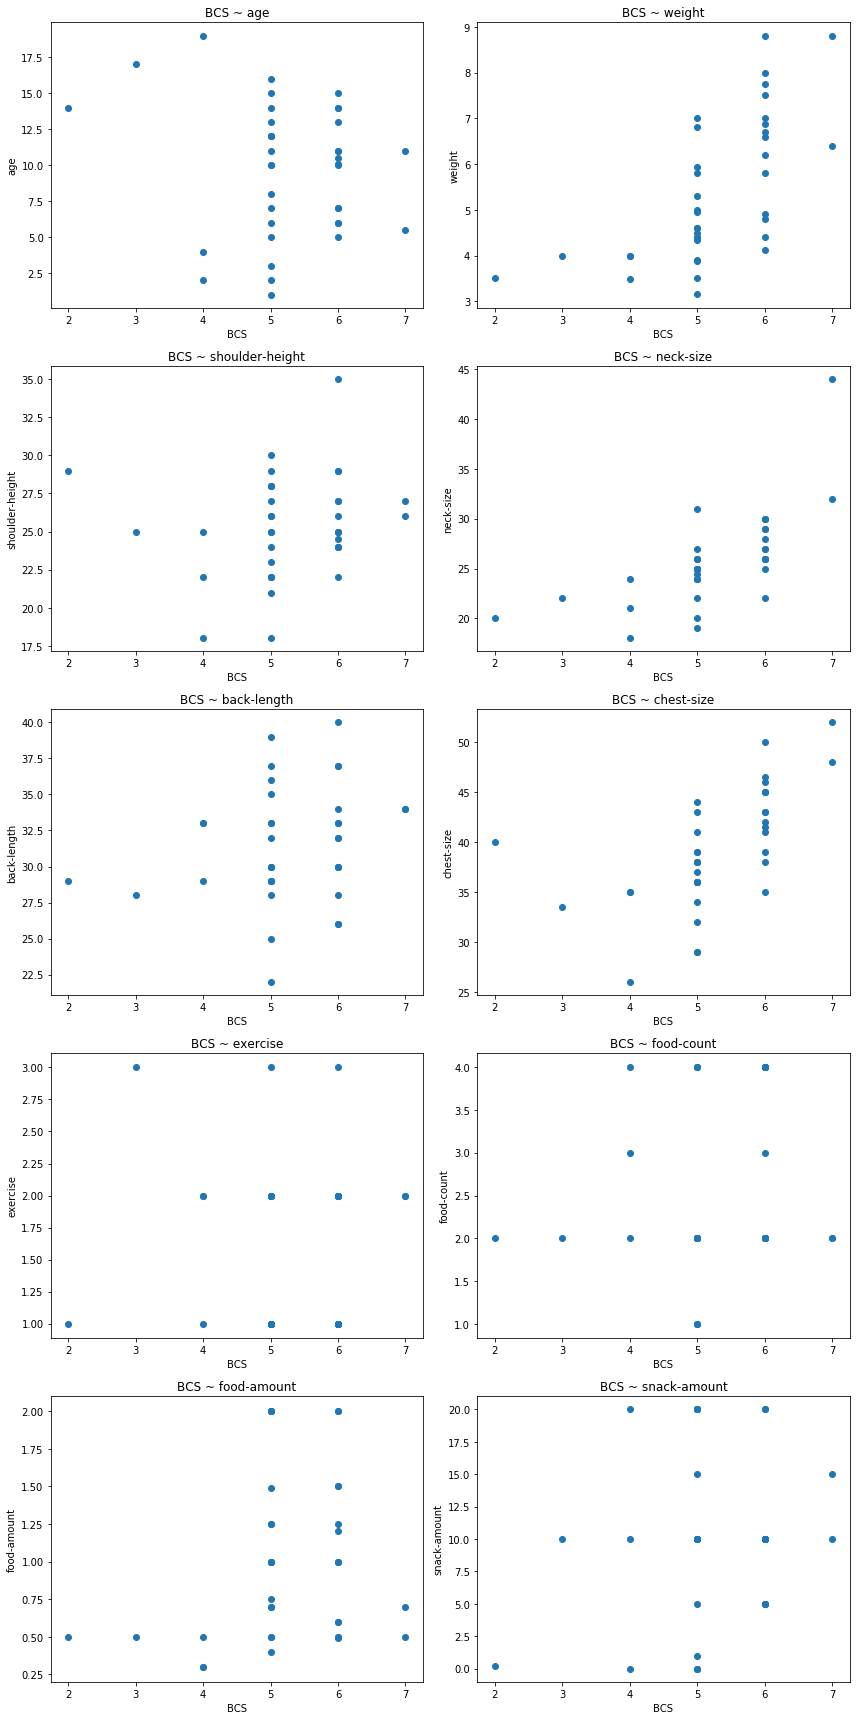





                 corr_with_BCS
age                     -0.156
weight                   0.634
shoulder-height          0.145
neck-size                0.668
back-length              0.225
chest-size               0.590
exercise                 0.020
food-count               0.141
food-amount              0.198
snack-amount             0.162




CHI's corr plot



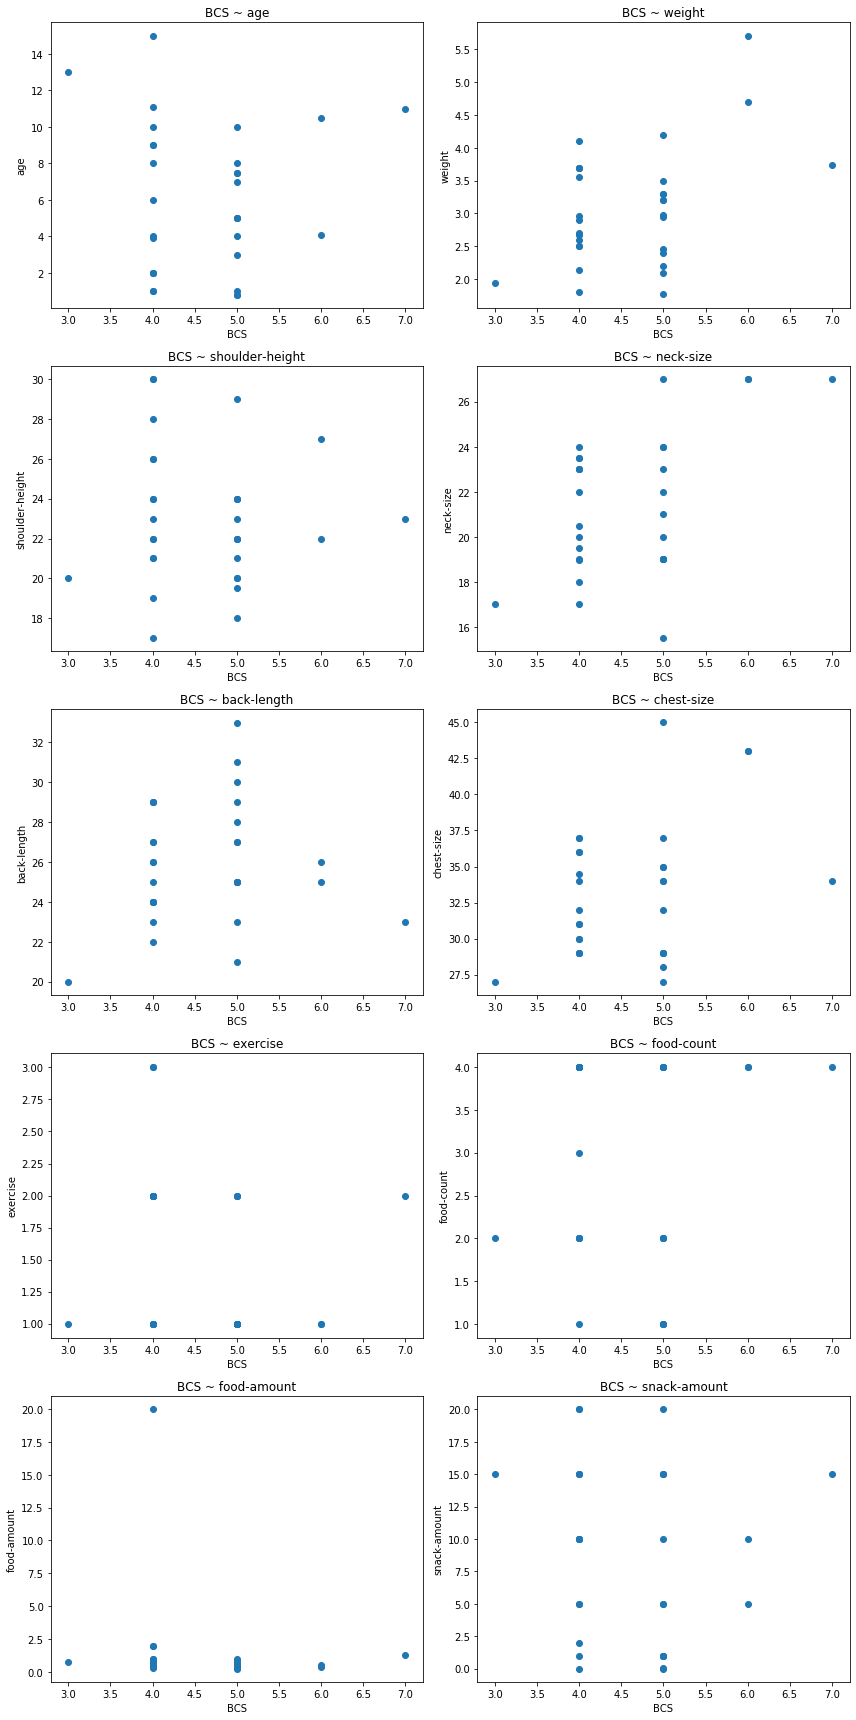





                 corr_with_BCS
age                     -0.010
weight                   0.439
shoulder-height         -0.022
neck-size                0.476
back-length              0.119
chest-size               0.366
exercise                -0.212
food-count               0.096
food-amount             -0.160
snack-amount            -0.110






In [151]:
for name in breed_name:
    df_breed = df.loc[df['breed'] == name][['BCS', 'age', 'weight', 'shoulder-height', 'neck-size',
                                            'back-length', 'chest-size', 'exercise',
                                            'food-count', 'food-amount', 'snack-amount']]
    
    corr_subplot(df_breed, name)
    
    corr_breed = pd.DataFrame(round(df_breed.corr(method = 'pearson')['BCS'][['age', 'weight', 'shoulder-height',
                                                                              'neck-size', 'back-length', 'chest-size',
                                                                              'exercise', 'food-count', 'food-amount', 
                                                                              'snack-amount']], 3))
    corr_breed.columns = ['corr_with_BCS']
    print(corr_breed)
    print('\n')
    print('\n')

# 위의 플롯이 전체 품종 상관관계 한번에 그린 결과

In [195]:
df.columns

Index(['type', 'species', 'mission-id', 'provider-code', 'breed', 'age',
       'class', 'sex', 'weight', 'shoulder-height', 'neck-size', 'back-length',
       'chest-size', 'BCS', 'body-part', 'exercise', 'food-count',
       'environment', 'defecation', 'food-amount', 'snack-amount',
       'food-kind'],
      dtype='object')

In [194]:
from scipy.stats import kendalltau
kendalltau(df.exercise, df.BCS)

KendalltauResult(correlation=0.004162010383982634, pvalue=0.8953899877333167)

In [ ]:
kendalltau(df.exercise, df.BCS)

In [197]:
pet_df.drop_duplicates('mission-id')

,type,species,mission-id,provider-code,breed,age,class,sex,weight,shoulder-height,...,environment,defecation,food-amount,snack-amount,food-kind,image-id,label,points,shape,part
0,A,10,10_000077,1,ETC,4.0,MS,IM,11.00,30.0,...,1,2,1.00,1.00,1,A_10_ETC_IM_20221005_10_000077_12.jpg,전신,"[[3131, 191], [450, 2669]]",Bounding Box,우측면하45도
18,A,10,10_000078,3,ETC,2.0,MS,SF,9.60,35.0,...,1,1,2.00,1.00,1,A_10_ETC_SF_20221006_10_000078_17.jpg,두상,"[[1178, 235], [3217, 2883]]",Bounding Box,두상전면상45도
30,A,10,10_000083,2,DRI,12.0,SS,IF,3.50,22.0,...,1,1,1.00,20.00,1,A_10_DRI_IF_20221016_10_000083_10.jpg,전신,"[[287, 48], [1319, 943]]",Bounding Box,우측면우45도
38,A,10,10_000084,2,ETC,4.0,SS,SF,5.75,33.0,...,1,1,1.00,19.99,1,A_10_ETC_SF_20221017_10_000084_18.jpg,두상,"[[81, 481], [655, 1058]]",Bounding Box,두상전면하45도
44,A,10,10_000085,2,POO,16.0,SS,IF,3.59,23.0,...,1,1,1.49,20.00,2,A_10_POO_IF_20221016_10_000085_17.jpg,두상,"[[121, 261], [886, 983]]",Bounding Box,두상전면상45도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,A,20,20_000016,22,KOR,7.0,SH,CM,5.00,22.0,...,1,1,1.00,10.00,1,A_20_KOR_CM_20221126_20_000016_12.jpg,전신,"[[836, 295], [2535, 2004]]",Bounding Box,우측면하45도
12660,A,20,20_000018,9,KOR,0.0,SH,IM,3.63,25.0,...,2,1,0.50,0.00,1,A_20_KOR_IM_20221130_20_000018_17.jpg,두상,"[[103, 600], [1623, 1879]]",Bounding Box,두상전면상45도
12679,A,20,20_000019,4,SIA,7.0,SH,SF,3.80,24.0,...,1,1,1.00,0.00,1,A_20_SIA_SF_20221202_20_000019_02.jpg,전신,"[[844, 686], [2296, 3454]]",Bounding Box,후면
12691,A,20,20_000023,2,KOR,8.0,SH,CM,6.15,25.0,...,1,1,1.50,10.00,1,A_20_KOR_CM_20221212_20_000023_11.jpg,전신,"[[1034, 662], [3201, 2842]]",Bounding Box,우측면상45도


In [231]:
a = pet_df.drop_duplicates(['mission-id', 'BCS'])[['mission-id', 'BCS']].groupby('mission-id').count().reset_index()
multiBCS_list = a.loc[a['BCS'] != 1]['mission-id'].to_list()

In [232]:
multiBCS_list

['10_000859',
 '10_000867',
 '10_000914',
 '10_000963',
 '10_001010',
 '10_001057',
 '10_001076',
 '10_001099',
 '10_001138',
 '10_001153',
 '10_001471']

In [259]:
# i[3]: mission-id
# i[13]: BCS
for i in pet_df.itertuples():
    new_BCS = pet_df.loc[pet_df['mission-id'] == i[3]].BCS.value_counts().idxmax()
    pet_df.loc[(pet_df['mission-id'] == i[3]), 'BCS'] = new_BCS
    

In [260]:
pet_df.drop_duplicates(['mission-id', 'BCS'])

,type,species,mission-id,provider-code,breed,age,class,sex,weight,shoulder-height,...,environment,defecation,food-amount,snack-amount,food-kind,image-id,label,points,shape,part
0,A,10,10_000077,1,ETC,4.0,MS,IM,11.00,30.0,...,1,2,1.00,1.00,1,A_10_ETC_IM_20221005_10_000077_12.jpg,전신,"[[3131, 191], [450, 2669]]",Bounding Box,우측면하45도
18,A,10,10_000078,3,ETC,2.0,MS,SF,9.60,35.0,...,1,1,2.00,1.00,1,A_10_ETC_SF_20221006_10_000078_17.jpg,두상,"[[1178, 235], [3217, 2883]]",Bounding Box,두상전면상45도
30,A,10,10_000083,2,DRI,12.0,SS,IF,3.50,22.0,...,1,1,1.00,20.00,1,A_10_DRI_IF_20221016_10_000083_10.jpg,전신,"[[287, 48], [1319, 943]]",Bounding Box,우측면우45도
38,A,10,10_000084,2,ETC,4.0,SS,SF,5.75,33.0,...,1,1,1.00,19.99,1,A_10_ETC_SF_20221017_10_000084_18.jpg,두상,"[[81, 481], [655, 1058]]",Bounding Box,두상전면하45도
44,A,10,10_000085,2,POO,16.0,SS,IF,3.59,23.0,...,1,1,1.49,20.00,2,A_10_POO_IF_20221016_10_000085_17.jpg,두상,"[[121, 261], [886, 983]]",Bounding Box,두상전면상45도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12645,A,20,20_000016,22,KOR,7.0,SH,CM,5.00,22.0,...,1,1,1.00,10.00,1,A_20_KOR_CM_20221126_20_000016_12.jpg,전신,"[[836, 295], [2535, 2004]]",Bounding Box,우측면하45도
12660,A,20,20_000018,9,KOR,0.0,SH,IM,3.63,25.0,...,2,1,0.50,0.00,1,A_20_KOR_IM_20221130_20_000018_17.jpg,두상,"[[103, 600], [1623, 1879]]",Bounding Box,두상전면상45도
12679,A,20,20_000019,4,SIA,7.0,SH,SF,3.80,24.0,...,1,1,1.00,0.00,1,A_20_SIA_SF_20221202_20_000019_02.jpg,전신,"[[844, 686], [2296, 3454]]",Bounding Box,후면
12691,A,20,20_000023,2,KOR,8.0,SH,CM,6.15,25.0,...,1,1,1.50,10.00,1,A_20_KOR_CM_20221212_20_000023_11.jpg,전신,"[[1034, 662], [3201, 2842]]",Bounding Box,우측면상45도


In [261]:
pet_df.to_csv('pet_df.csv', index = False)

In [213]:
b = pet_df.drop_duplicates(['mission-id', 'BCS', 'breed'])[['mission-id', 'BCS', 'breed']].groupby('mission-id').count().reset_index()
b.loc[a['BCS'] != 1]

,mission-id,BCS,breed
229,10_000859,2,2
235,10_000867,2,2
274,10_000914,2,2
305,10_000963,2,2
327,10_001010,2,2
340,10_001057,2,2
359,10_001076,2,2
382,10_001099,2,2
412,10_001138,2,2
426,10_001153,2,2


In [223]:
pet_df.loc[(pet_df['mission-id'] == '10_000460') & (pet_df['breed'] == 'CHI'), 'breed'] = 'MIX'

In [224]:
pet_df.loc[(pet_df['mission-id'] == '10_000460') & (pet_df['breed'] == 'CHI'), 'breed']

Series([], Name: breed, dtype: object)

In [225]:
pet_df.to_csv('pet_df.csv', index = False)

In [216]:
pet_df.loc[pet_df['mission-id'] == '10_000460'][['mission-id', 'breed', 'BCS', 'provider-code']]

,mission-id,breed,BCS,provider-code
1631,10_000460,MIX,4,2
1632,10_000460,MIX,4,2
1633,10_000460,MIX,4,2
1634,10_000460,MIX,4,2
1635,10_000460,MIX,4,2
1636,10_000460,MIX,4,2
1637,10_000460,MIX,4,2
1638,10_000460,MIX,4,2
1639,10_000460,MIX,4,2
1640,10_000460,MIX,4,2


In [236]:
for i in multiBCS_list:
    print(i)
    print(pet_df.loc[pet_df['mission-id'] == i][['BCS']].value_counts())
    print('\n')

10_000859
BCS
6      11
7       7
dtype: int64


10_000867
BCS
4      12
2       8
dtype: int64


10_000914
BCS
4      12
3       8
dtype: int64


10_000963
BCS
5      12
3       8
dtype: int64


10_001010
BCS
6      10
5       9
dtype: int64


10_001057
BCS
5      7
4      5
dtype: int64


10_001076
BCS
5      11
3       7
dtype: int64


10_001099
BCS
3      18
5       2
dtype: int64


10_001138
BCS
5      11
3       8
dtype: int64


10_001153
BCS
4      11
3       7
dtype: int64


10_001471
BCS
5      19
8       1
dtype: int64




In [228]:
pet_df.loc[pet_df['mission-id'] == '10_001099'][['BCS']]

,BCS
6135,3
6136,3
6137,3
6138,3
6139,3
6140,3
6141,3
6142,3
6143,3
6144,5


MAL's corr plot



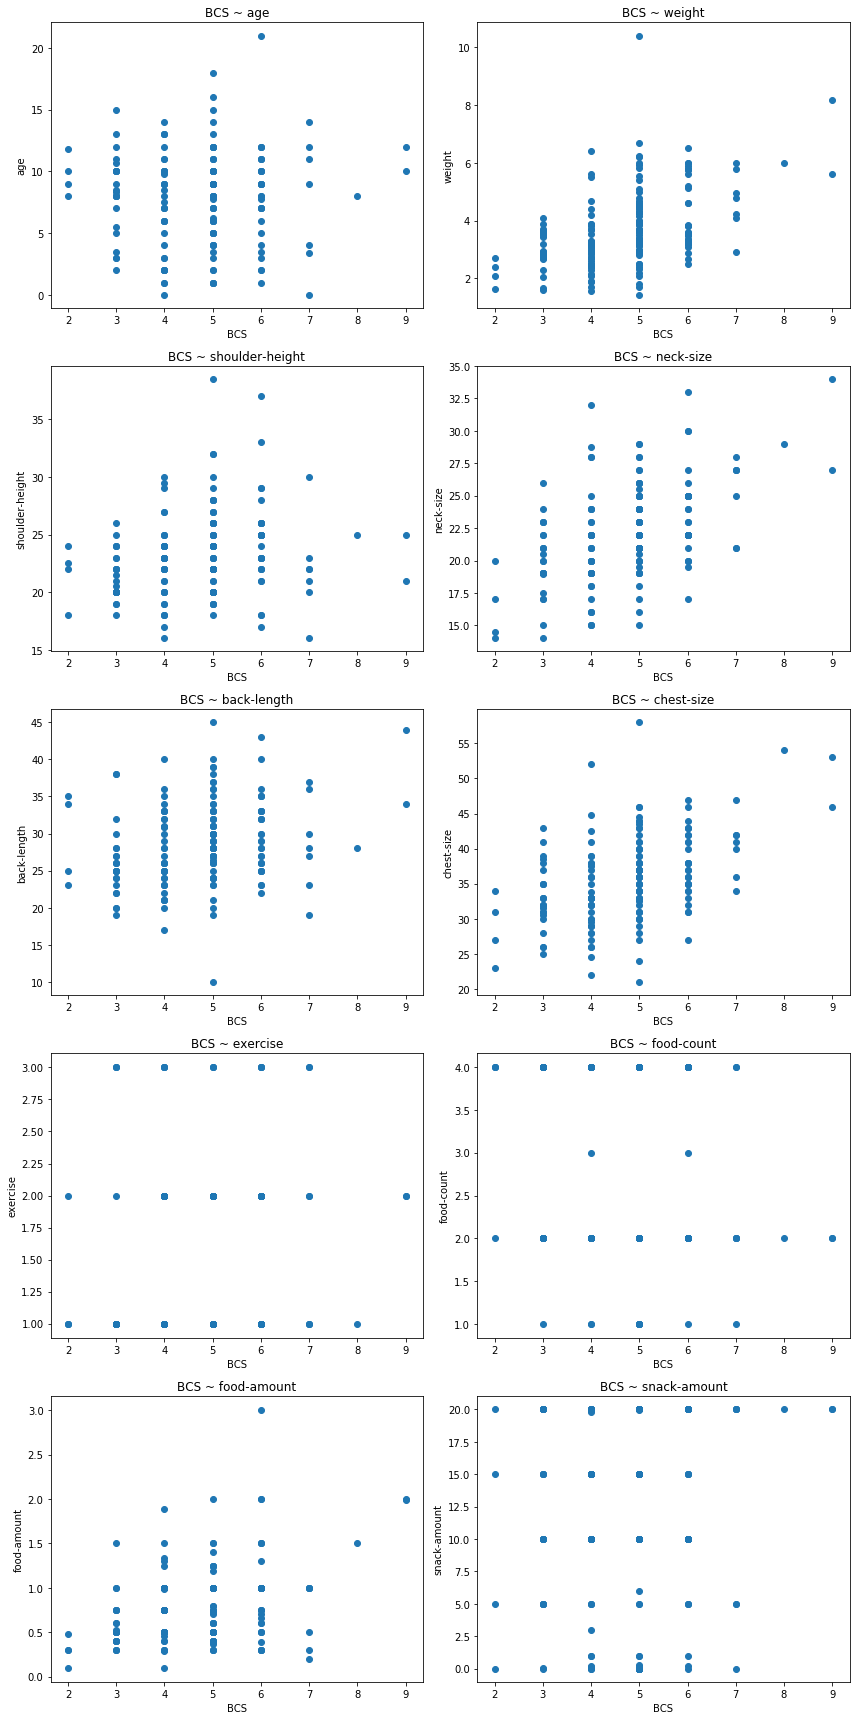

In [136]:
corr_subplot(df_mal, 'MAL')

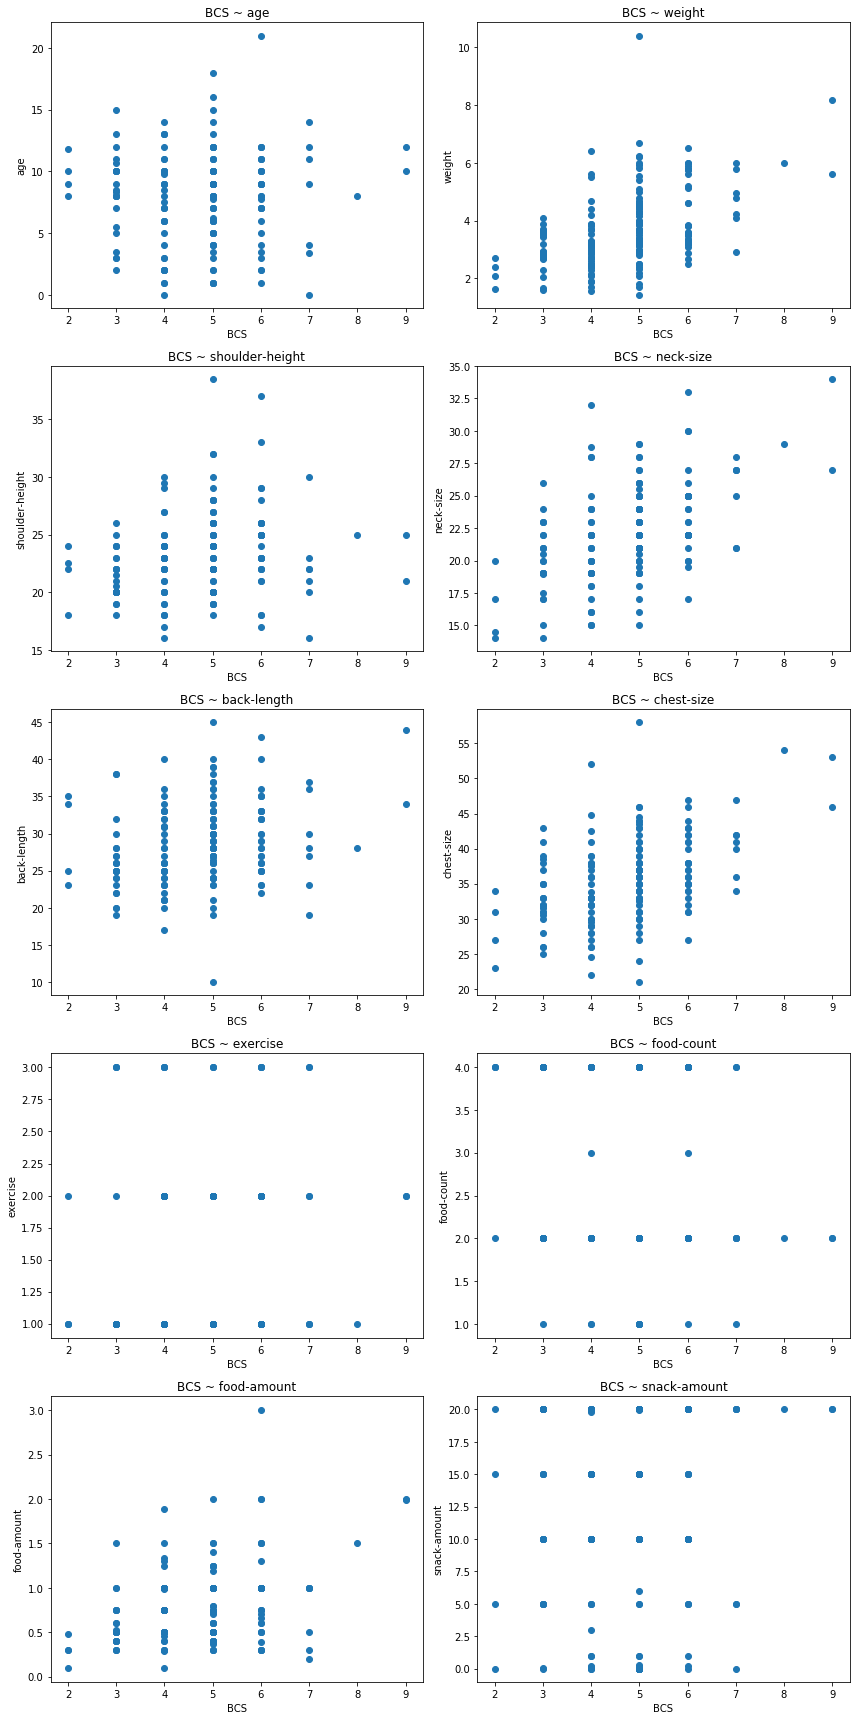

In [125]:
fig = plt.figure(figsize = (12, 24))

for n, col in enumerate(col_list):
    
    X, Y, predictor = corr_plot(df_mal, col)
    
    ax = fig.add_subplot(5, 2, n + 1)
    ax.scatter(X, Y)
    ax.set_title(f'BCS ~ {col}')
    ax.set_ylabel(col)
    ax.set_xlabel('BCS')

    #for tick in ax.get_xticklabels():
    #    tick.set_rotation(90)

plt.tight_layout()
plt.show()

In [67]:
from statsmodels.formula.api import ols

In [159]:
df_mal_reg = df_mal[['BCS', 'age', 'weight', 'shoulder-height', 'neck-size',
                     'back-length', 'chest-size', 'exercise',
                     'food-count', 'food-amount', 'snack-amount']]

df_mal_reg.columns = [['BCS', 'age', 'weight', 'shoulder_height', 'neck_size',
                       'back_length', 'chest_size', 'exercise',
                       'food_count', 'food_amount', 'snack_amount']]

In [156]:
df_mal_reg

,BCS,age,weight,shoulder_height,neck_size,back_length,chest_size,exercise,food_count,food-amount,snack-amount
140,5,7.0,3.39,20.0,25.0,10.0,32.98,1,2,1.00,0.00
209,7,0.0,2.91,21.0,21.0,19.0,34.00,1,2,0.30,19.99
222,5,18.0,2.99,21.0,21.0,19.0,34.00,1,2,0.30,19.98
458,5,1.0,1.70,20.0,16.0,24.0,28.00,2,2,0.37,1.00
476,7,12.0,6.00,22.0,27.0,23.0,47.00,1,4,0.20,19.99
...,...,...,...,...,...,...,...,...,...,...,...
11916,5,2.0,2.50,25.0,22.0,28.0,30.00,2,1,1.00,1.00
12435,6,9.0,3.10,22.0,22.0,23.0,33.00,1,4,1.00,15.00
12453,6,8.0,3.20,25.0,20.0,23.0,34.00,1,4,1.00,15.00
12472,4,9.8,3.69,27.0,28.0,35.0,39.00,2,2,0.40,10.00


In [162]:
res_all = ols('BCS ~ age + weight + shoulder_height + neck_size + back_length + chest_size + exercise + food_count + food_amount + snack_amount',
              data = df_mal_reg).fit()
res_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     7.491
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           1.09e-09
Time:                        23:07:44   Log-Likelihood:                -242.29
No. Observations:                 168   AIC:                             506.6
Df Residuals:                     157   BIC:                             541.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5878      1.029      1.543      0.125      -0.445       3.621
age                -0.0175      0.023     -0.762      0.447      -0.063       0.028
weight              0.1027      0.143      0.720      0.473      -0.179       0.385
shoulder_height    -0.0221      0.027     -0.810      0.419      -0.076       0.032
neck_size           0.0909      0.033      2.787      0.006       0.026       0.155
back_length        -0.0005      0.018     -0.029      0.977      -0.037       0.036
chest_size          0.0275      0.030      0.925      0.356      -0.031       0.086
exercise            0.1007      0.137      0.733      0.464      -0.171       0.372
food_count         -0.1024      0.096     -1.064      0.289      -0.293       0.088
food_amount         0.4831      0.206      2.340      0.021       0.075       0.891
snack_amount        0.0139      0.012      1.125      0.262      -0.011       0.038
==============================================================================
Omnibus:                        1.783   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.446
Skew:                           0.022   Prob(JB):                        0.485
Kurtosis:                       2.548   Cond. No.                         738.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [157]:
res_weight = ols('BCS ~ weight', data = df_reg).fit()
res_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     21.41
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.37e-06
Time:                        23:04:06   Log-Likelihood:                -1133.3
No. Observations:                 739   AIC:                             2271.
Df Residuals:                     737   BIC:                             2280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6837      0.059     79.190      0.000       4.568       4.800
weight         0.0316      0.007      4.627      0.000       0.018       0.045
==============================================================================
Omnibus:                       17.151   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.264
Skew:                           0.209   Prob(JB):                     3.27e-06
Kurtosis:                       3.804   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
res_chest = ols('BCS ~ chest_size', data = df_reg).fit()
res_chest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     90.55
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           2.50e-20
Time:                        22:11:16   Log-Likelihood:                -1101.0
No. Observations:                 739   AIC:                             2206.
Df Residuals:                     737   BIC:                             2215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3722      0.163     20.654      0.000       3.052       3.693
chest_size     0.0373      0.004      9.516      0.000       0.030       0.045
==============================================================================
Omnibus:                        7.117   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                9.386
Skew:                           0.078   Prob(JB):                      0.00916
Kurtosis:                       3.529   Cond. No.                         172.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
res_neck = ols('BCS ~ neck_size', data = df_reg).fit()
res_neck.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     39.92
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           4.59e-10
Time:                        22:11:20   Log-Likelihood:                -1124.3
No. Observations:                 739   AIC:                             2253.
Df Residuals:                     737   BIC:                             2262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9495      0.153     25.855      0.000       3.650       4.249
neck_size      0.0366      0.006      6.318      0.000       0.025       0.048
==============================================================================
Omnibus:                       15.029   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.853
Skew:                           0.127   Prob(JB):                     4.01e-06
Kurtosis:                       3.861   Cond. No.                         98.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
res_back = ols('BCS ~ back_length', data = df_reg).fit()
res_back.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     9.766
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0205
Time:                        22:41:45   Log-Likelihood:                -7.2290
No. Observations:                   8   AIC:                             18.46
Df Residuals:                       6   BIC:                             18.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.4686      1.234      1.190      0.279      -1.552       4.489
back_length     0.1080      0.035      3.125      0.020       0.023       0.193
==============================================================================
Omnibus:                        1.844   Durbin-Watson:                   2.750
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                0.741
Skew:                           0.725   Prob(JB):                        0.690
Kurtosis:                       2.653   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
res_sh = ols('BCS ~ shoulder_height', data = df_reg).fit()
res_sh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     3.246
Date:                Thu, 22 Dec 2022   Prob (F-statistic):              0.122
Time:                        22:41:45   Log-Likelihood:                -9.3635
No. Observations:                   8   AIC:                             22.73
Df Residuals:                       6   BIC:                             22.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.6849      1.459      1.840      0.115      -0.885       6.255
shoulder_height     0.0989      0.055      1.802      0.122      -0.035       0.233
==============================================================================
Omnibus:                        0.716   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.699   Jarque-Bera (JB):                0.594
Skew:                           0.370   Prob(JB):                        0.743
Kurtosis:                       1.889   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
res_ex = ols('BCS ~ exercise', data = df_reg).fit()
res_ex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     5.761
Date:                Thu, 22 Dec 2022   Prob (F-statistic):             0.0533
Time:                        22:41:46   Log-Likelihood:                -8.4011
No. Observations:                   8   AIC:                             20.80
Df Residuals:                       6   BIC:                             20.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6522      1.040      7.359      0.000       5.108      10.197
exercise      -1.1304      0.471     -2.400      0.053      -2.283       0.022
==============================================================================
Omnibus:                        1.480   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.477   Jarque-Bera (JB):                0.777
Skew:                          -0.705   Prob(JB):                        0.678
Kurtosis:                       2.418   Cond. No.                         9.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
import statsmodels.api as sm

y = df_mal_reg['BCS']
X = df_mal_reg.drop('BCS', axis = 1)

variables = df_mal_reg.columns[1:].tolist()

selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.15
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

while len(variables) > 0:
    print(selected_variables)
    remainder = list(set(variables) - set(selected_variables))
    print(remainder)
    pval = pd.Series(index = remainder) ## 변수의 p-value
    
    for col in remainder: 
        X = df_mal_reg[selected_variables + [col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
        print(pval)
 
    min_pval = pval.min()
    if min_pval < sl_enter:
        selected_variables.append(pval.idxmin())
        
        while len(selected_variables) > 0:
            
            selected_X = df_mal_reg[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y, selected_X).fit().pvalues[1:]
            max_pval = selected_pval.max()
            
            if max_pval >= sl_remove:
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_mal_reg[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
        
selected_variables

[]
[('food_count',), ('snack_amount',), ('shoulder_height',), ('age',), ('exercise',), ('back_length',), ('chest_size',), ('weight',), ('food_amount',), ('neck_size',)]
(food_count,)         0.048922
(snack_amount,)            NaN
(shoulder_height,)         NaN
(age,)                     NaN
(exercise,)                NaN
(back_length,)             NaN
(chest_size,)              NaN
(weight,)                  NaN
(food_amount,)             NaN
(neck_size,)               NaN
dtype: float64
(food_count,)         0.048922
(snack_amount,)       0.205643
(shoulder_height,)         NaN
(age,)                     NaN
(exercise,)                NaN
(back_length,)             NaN
(chest_size,)              NaN
(weight,)                  NaN
(food_amount,)             NaN
(neck_size,)               NaN
dtype: float64
(food_count,)         0.048922
(snack_amount,)       0.205643
(shoulder_height,)    0.007438
(age,)                     NaN
(exercise,)                NaN
(back_length,)            

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


[('neck_size',), ('food_amount',), ('chest_size',)]

In [167]:
reg_mal_optimal = ols('BCS ~ neck_size + food_amount + chest_size', data = df_mal_reg).fit()
reg_mal_optimal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BCS   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     23.80
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           7.72e-13
Time:                        23:13:10   Log-Likelihood:                -244.71
No. Observations:                 168   AIC:                             497.4
Df Residuals:                     164   BIC:                             509.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7464      0.523      1.428      0.155      -0.286       1.779
neck_size       0.0980      0.031      3.185      0.002       0.037       0.159
food_amount     0.5373      0.197      2.724      0.007       0.148       0.927
chest_size      0.0394      0.018      2.130      0.035       0.003       0.076
==============================================================================
Omnibus:                        0.733   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.811
Skew:                           0.033   Prob(JB):                        0.667
Kurtosis:                       2.666   Cond. No.                         274.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
import statsmodels.api as sm

for name in breed_name:
    df_breed = df.loc[df['breed'] == name][['BCS', 'age', 'weight', 'shoulder-height', 'neck-size',
                                            'back-length', 'chest-size', 'exercise',
                                            'food-count', 'food-amount', 'snack-amount']]
    df_breed.columns = ['BCS', 'age', 'weight', 'shoulder_height', 'neck_size',
                        'back_length', 'chest_size', 'exercise',
                        'food_count', 'food_amount', 'snack_amount']
    
    # 변수선택
    y = df_breed['BCS']
    x = df_breed.drop('BCS', axis = 1)

    variables = df_breed.columns[1:].tolist()

    selected_variables = []
    sl_enter = 0.05
    sl_remove = 0.15
 
    sv_per_step = []
    adjusted_r_squared = []
    steps = []
    step = 0

    while len(variables) > 0:
        
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index = remainder)
    
        for col in remainder: 
            x = df_breed[selected_variables + [col]]
            x = sm.add_constant(x)
            model = sm.OLS(y, x).fit()
            pval[col] = model.pvalues[col]
        
        min_pval = pval.min()
        if min_pval < sl_enter:
            selected_variables.append(pval.idxmin())
        
            while len(selected_variables) > 0:
            
                selected_X = df_breed[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y, selected_X).fit().pvalues[1:]
                max_pval = selected_pval.max()
            
                if max_pval >= sl_remove:
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
        
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(df_breed[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    
    print(f"{name}'s selected variables: ")
    print(selected_variables)
    print('\n')
    selected_var = ' + '.join(selected_variables)
    reg_breed = ols(f'BCS ~ {selected_var}', data = df_breed).fit()
    print(reg_breed.summary())
    print('\n')
    print('\n')

/home/jh20/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


MAL's selected variables: 
['neck_size', 'food_amount', 'chest_size']


                            OLS Regression Results                            
Dep. Variable:                    BCS   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     23.80
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           7.72e-13
Time:                        23:24:01   Log-Likelihood:                -244.71
No. Observations:                 168   AIC:                             497.4
Df Residuals:                     164   BIC:                             509.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------